In [9]:
#Interacting Fermions on a 1D Lattice
#Quantum circuit of Hubbard Hamiltonian for Variational Quantum Eigensolver
import qiskit
import matplotlib.pyplot as plt
from qiskit.visualization import matplotlib
# initialization

# python libraries
import numpy as np
from copy import deepcopy

# qiskit libraries
from qiskit import *

# define the lattice
M  = 5    # number of lattice sites 
t  = 1.0  # hopping energy
U  = 0.1  # Coulomb energy
Nu = 3    # number of spin-up electrons 
Nd = 3    # number of spin-down electrons 

# initialize variational parameters 
S     = 3                     # number of Trotter-Suzuki steps 
theta = np.random.rand(S, 5)  # 5 Hamiltonian terms in each step 

# initialize the circuit 
circ_empty = QuantumCircuit(2*M)


In [10]:
 #compose quantum circuit 

def compose_initial_circuit(circuit, _M, _Nu, _Nd):
    for i in range(_Nu):
        circuit.x(i) 
    for i in range(_Nd): 
        circuit.x(_M+i)
    return circuit

circ_initial = compose_initial_circuit(deepcopy(circ_empty), M, Nu, Nd)
circ_initial.draw()


┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     ├───┤
q_2: ┤ X ├
     └───┘
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ X ├
     ├───┤
q_6: ┤ X ├
     ├───┤
q_7: ┤ X ├
     └───┘
q_8: ─────
          
q_9: ─────

In [11]:
# compose quantum circuit 

def compose_ansatz_circuit(circuit, _M, _S, _theta): 
    # scale theta based on t and U
    _theta[:, :4] = -t/2.0*_theta[:, :4]
    _theta[:, 4] = U*_theta[:, 4]
    # loop over S Trotter-Suzuki steps 
    for j in range(_S):
        # XX and YY interactions: loop over even and odd terms
        for parity in [0]:
            # loop over orbitals
            for i in range(_M-1):
                if i%2 == parity:
                    # loop over spin up and down qubits
                    for spin_index in [0, _M]: 
                        circuit.cx(spin_index+i, spin_index+i+1)
                        circuit.rx(_theta[j, 2*parity+0], spin_index+i)    # theta_j,xe(o)
                        circuit.h(spin_index+i+1)
                        circuit.cx(spin_index+i+1, spin_index+i)
                        circuit.rx(-_theta[j, 2*parity+1], spin_index+i+1) # theta_j,ye(o)
                        circuit.cx(spin_index+i+1, spin_index+i)
                        circuit.h(spin_index+i+1)
                        circuit.cx(spin_index+i, spin_index+i+1) 
        # barrier
        circuit.barrier()
        # ZZ interactions
        # loop over orbitals
        for i in range(_M):
            circuit.crz(_theta[j, 4], i, _M+i)
    return circuit

circ_ansatz = compose_ansatz_circuit(deepcopy(circ_empty), M, S, theta)
circ_ansatz.draw()

┌──────────────┐┌───┐               ┌───┐           ░ »
q_0: ──■──┤ Rx(-0.13946) ├┤ X ├───────────────┤ X ├───────■───░─»
     ┌─┴─┐└────┬───┬─────┘└─┬─┘┌─────────────┐└─┬─┘┌───┐┌─┴─┐ ░ »
q_1: ┤ X ├─────┤ H ├────────■──┤ Rx(0.45144) ├──■──┤ H ├┤ X ├─░─»
     └───┘┌────┴───┴─────┐┌───┐└─────────────┘┌───┐└───┘└───┘ ░ »
q_2: ──■──┤ Rx(-0.13946) ├┤ X ├───────────────┤ X ├───────■───░─»
     ┌─┴─┐└────┬───┬─────┘└─┬─┘┌─────────────┐└─┬─┘┌───┐┌─┴─┐ ░ »
q_3: ┤ X ├─────┤ H ├────────■──┤ Rx(0.45144) ├──■──┤ H ├┤ X ├─░─»
     └───┘     └───┘           └─────────────┘     └───┘└───┘ ░ »
q_4: ─────────────────────────────────────────────────────────░─»
          ┌──────────────┐┌───┐               ┌───┐           ░ »
q_5: ──■──┤ Rx(-0.13946) ├┤ X ├───────────────┤ X ├───────■───░─»
     ┌─┴─┐└────┬───┬─────┘└─┬─┘┌─────────────┐└─┬─┘┌───┐┌─┴─┐ ░ »
q_6: ┤ X ├─────┤ H ├────────■──┤ Rx(0.45144) ├──■──┤ H ├┤ X ├─░─»
     └───┘┌────┴───┴─────┐┌───┐└─────────────┘┌───┐└───┘└───┘ ░ »
q_7: ──■──┤ Rx(-0.13946) ├┤ X ├───────────────┤ X ├───────■───░─»
     ┌─┴─┐└────┬───┬─────┘└─┬─┘┌─────────────┐└─┬─┘┌───┐┌─┴─┐ ░ »
q_8: ┤ X ├─────┤ H ├────────■──┤ Rx(0.45144) ├──■──┤ H ├┤ X ├─░─»
     └───┘     └───┘           └─────────────┘     └───┘└───┘ ░ »
q_9: ─────────────────────────────────────────────────────────░─»
                                                              ░ »
«                                                     ┌───────────────┐»
«q_0: ───────■───────────────────────────────■────────┤ Rx(-0.027231) ├»
«            │                             ┌─┴─┐      └─────┬───┬─────┘»
«q_1: ───────┼───────────────■─────────────┤ X ├────────────┤ H ├──────»
«            │               │             └───┘            └───┘      »
«q_2: ───────┼───────────────┼───────────────■─────────────────────────»
«            │               │               │                         »
«q_3: ───────┼───────────────┼───────────────┼────────────────■────────»
«            │               │               │                │        »
«q_4: ───────┼───────────────┼───────────────┼────────────────┼────────»
«     ┌──────┴───────┐       │               │                │        »
«q_5: ┤ Rz(0.021502) ├───────┼───────────────┼────────────────┼────────»
«     └──────────────┘┌──────┴───────┐       │                │        »
«q_6: ────────────────┤ Rz(0.021502) ├───────┼────────────────┼────────»
«                     └──────────────┘┌──────┴───────┐        │        »
«q_7: ────────────────────────────────┤ Rz(0.021502) ├────────┼────────»
«                                     └──────────────┘ ┌──────┴───────┐»
«q_8: ─────────────────────────────────────────────────┤ Rz(0.021502) ├»
«                                                      └──────────────┘»
«q_9: ─────────────────────────────────────────────────────────────────»
«                                                                      »
«          ┌───┐                             ┌───┐                     »
«q_0: ─────┤ X ├─────────────────────────────┤ X ├─────────────────────»
«          └─┬─┘       ┌─────────────┐       └─┬─┘           ┌───┐     »
«q_1: ───────■─────────┤ Rx(0.11093) ├─────────■─────────────┤ H ├─────»
«                     ┌┴─────────────┴┐      ┌───┐           └───┘     »
«q_2: ───────■────────┤ Rx(-0.027231) ├──────┤ X ├─────────────────────»
«          ┌─┴─┐      └─────┬───┬─────┘      └─┬─┘      ┌─────────────┐»
«q_3: ─────┤ X ├────────────┤ H ├──────────────■────────┤ Rx(0.11093) ├»
«          └───┘            └───┘                       └─────────────┘»
«q_4: ───────■─────────────────────────────────────────────────────────»
«            │                         ┌───────────────┐     ┌───┐     »
«q_5: ───────┼────────────────■────────┤ Rx(-0.027231) ├─────┤ X ├─────»
«            │              ┌─┴─┐      └─────┬───┬─────┘     └─┬─┘     »
«q_6: ───────┼──────────────┤ X ├────────────┤ H ├─────────────■───────»
«            │              └───┘      ┌─────┴───┴─────┐     ┌───┐   

In [12]:
# compose quantum circuit 

def compose_measurement_circuit(circuit, _M, which_term):
    if which_term == "xe": 
        for i in range(_M-1):
            circuit.x(i)
            circuit.x(_M+i)
    elif which_term == "xo": 
        for i in range(_M-1):
            circuit.x(i+1)
            circuit.x(_M+i+1)
    elif which_term == "ye": 
        for i in range(_M-1):
            circuit.y(i)
            circuit.y(_M+i)
    elif which_term == "yo": 
        for i in range(_M-1):
            circuit.y(i+1)
            circuit.y(_M+i+1)
    else:
        pass
    return circuit 

circ_measurement = compose_measurement_circuit(deepcopy(circ_empty), M, "xe")
circ_measurement.draw()


┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     ├───┤
q_2: ┤ X ├
     ├───┤
q_3: ┤ X ├
     └───┘
q_4: ─────
     ┌───┐
q_5: ┤ X ├
     ├───┤
q_6: ┤ X ├
     ├───┤
q_7: ┤ X ├
     ├───┤
q_8: ┤ X ├
     └───┘
q_9: ─────

In [13]:
circ_complete = circ_initial.compose(circ_ansatz).compose(circ_measurement)
circ_complete.draw()

┌───┐     ┌──────────────┐┌───┐               ┌───┐           ░ »
q_0: ┤ X ├──■──┤ Rx(-0.13946) ├┤ X ├───────────────┤ X ├───────■───░─»
     ├───┤┌─┴─┐└────┬───┬─────┘└─┬─┘┌─────────────┐└─┬─┘┌───┐┌─┴─┐ ░ »
q_1: ┤ X ├┤ X ├─────┤ H ├────────■──┤ Rx(0.45144) ├──■──┤ H ├┤ X ├─░─»
     ├───┤└───┘┌────┴───┴─────┐┌───┐└─────────────┘┌───┐└───┘└───┘ ░ »
q_2: ┤ X ├──■──┤ Rx(-0.13946) ├┤ X ├───────────────┤ X ├───────■───░─»
     └───┘┌─┴─┐└────┬───┬─────┘└─┬─┘┌─────────────┐└─┬─┘┌───┐┌─┴─┐ ░ »
q_3: ─────┤ X ├─────┤ H ├────────■──┤ Rx(0.45144) ├──■──┤ H ├┤ X ├─░─»
          └───┘     └───┘           └─────────────┘     └───┘└───┘ ░ »
q_4: ──────────────────────────────────────────────────────────────░─»
     ┌───┐     ┌──────────────┐┌───┐               ┌───┐           ░ »
q_5: ┤ X ├──■──┤ Rx(-0.13946) ├┤ X ├───────────────┤ X ├───────■───░─»
     ├───┤┌─┴─┐└────┬───┬─────┘└─┬─┘┌─────────────┐└─┬─┘┌───┐┌─┴─┐ ░ »
q_6: ┤ X ├┤ X ├─────┤ H ├────────■──┤ Rx(0.45144) ├──■──┤ H ├┤ X ├─░─»
     ├───┤└───┘┌────┴───┴─────┐┌───┐└─────────────┘┌───┐└───┘└───┘ ░ »
q_7: ┤ X ├──■──┤ Rx(-0.13946) ├┤ X ├───────────────┤ X ├───────■───░─»
     └───┘┌─┴─┐└────┬───┬─────┘└─┬─┘┌─────────────┐└─┬─┘┌───┐┌─┴─┐ ░ »
q_8: ─────┤ X ├─────┤ H ├────────■──┤ Rx(0.45144) ├──■──┤ H ├┤ X ├─░─»
          └───┘     └───┘           └─────────────┘     └───┘└───┘ ░ »
q_9: ──────────────────────────────────────────────────────────────░─»
                                                                   ░ »
«                                                     ┌───────────────┐»
«q_0: ───────■───────────────────────────────■────────┤ Rx(-0.027231) ├»
«            │                             ┌─┴─┐      └─────┬───┬─────┘»
«q_1: ───────┼───────────────■─────────────┤ X ├────────────┤ H ├──────»
«            │               │             └───┘            └───┘      »
«q_2: ───────┼───────────────┼───────────────■─────────────────────────»
«            │               │               │                         »
«q_3: ───────┼───────────────┼───────────────┼────────────────■────────»
«            │               │               │                │        »
«q_4: ───────┼───────────────┼───────────────┼────────────────┼────────»
«     ┌──────┴───────┐       │               │                │        »
«q_5: ┤ Rz(0.021502) ├───────┼───────────────┼────────────────┼────────»
«     └──────────────┘┌──────┴───────┐       │                │        »
«q_6: ────────────────┤ Rz(0.021502) ├───────┼────────────────┼────────»
«                     └──────────────┘┌──────┴───────┐        │        »
«q_7: ────────────────────────────────┤ Rz(0.021502) ├────────┼────────»
«                                     └──────────────┘ ┌──────┴───────┐»
«q_8: ─────────────────────────────────────────────────┤ Rz(0.021502) ├»
«                                                      └──────────────┘»
«q_9: ─────────────────────────────────────────────────────────────────»
«                                                                      »
«          ┌───┐                             ┌───┐                     »
«q_0: ─────┤ X ├─────────────────────────────┤ X ├─────────────────────»
«          └─┬─┘       ┌─────────────┐       └─┬─┘           ┌───┐     »
«q_1: ───────■─────────┤ Rx(0.11093) ├─────────■─────────────┤ H ├─────»
«                     ┌┴─────────────┴┐      ┌───┐           └───┘     »
«q_2: ───────■────────┤ Rx(-0.027231) ├──────┤ X ├─────────────────────»
«          ┌─┴─┐      └─────┬───┬─────┘      └─┬─┘      ┌─────────────┐»
«q_3: ─────┤ X ├────────────┤ H ├──────────────■────────┤ Rx(0.11093) ├»
«          └───┘            └───┘                       └─────────────┘»
«q_4: ───────■─────────────────────────────────────────────────────────»
«            │                         ┌───────────────┐     ┌───┐     »
«q_5: ───────┼────────────────■────────┤ Rx(-0.027231) ├─────┤ X ├─────»
«            │              ┌─┴─┐      └─────┬───┬─────┘     └─┬─┘     »
«q_6: ───────┼──────────────┤ X 

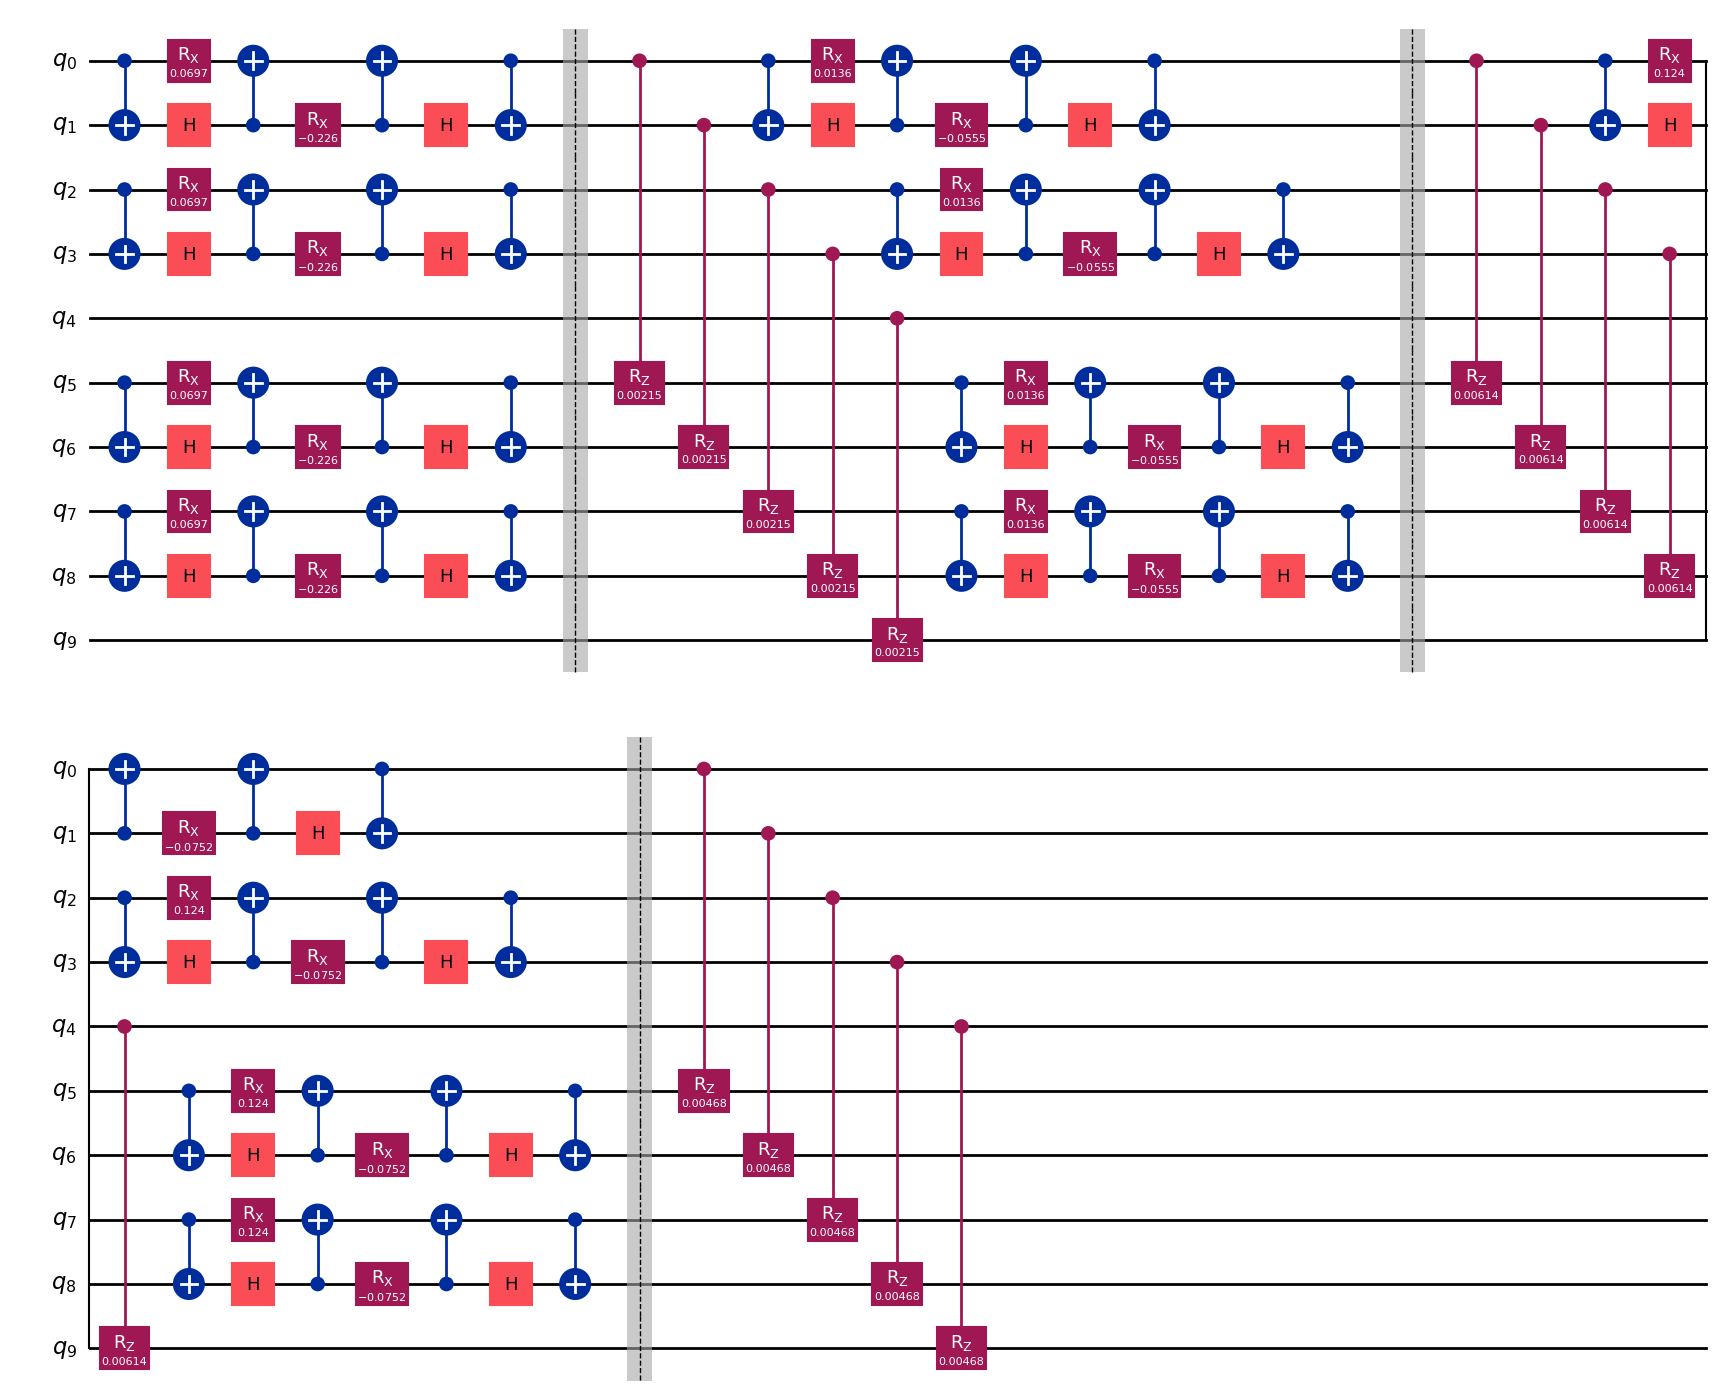

In [15]:
circ_complete = circ_initial.compose(circ_ansatz).compose(circ_measurement)
circ_complete.draw()

circ_ansatz = compose_ansatz_circuit(deepcopy(circ_empty), M, S, theta)
circ_ansatz.draw(output='mpl')
from qiskit.visualization import *
%matplotlib inline

circ_ansatz.draw(output='mpl')

plt.show()


In [16]:
import pennylane as qml
from pennylane import numpy as np

# Parameters
M = 5               # number of sites
t = 1.0             # hopping
U = 0.1             # Coulomb
S = 3               # Trotter steps
theta = np.random.rand(S, 5, requires_grad=True)

# Device: statevector simulator
dev = qml.device("default.qubit", wires=2*M)

# Define Hubbard Hamiltonian for given M
def hubbard_hamiltonian(M, t, U):
    coeffs = []
    ops = []

    # XX and YY terms (hopping)
    for i in range(M-1):
        for spin in [0, M]:  # up and down spins
            coeffs.append(-t/2)
            ops.append(qml.PauliX(wires=i+spin) @ qml.PauliX(wires=i+1+spin))
            coeffs.append(-t/2)
            ops.append(qml.PauliY(wires=i+spin) @ qml.PauliY(wires=i+1+spin))

    # ZZ terms (on-site interaction)
    for i in range(M):
        coeffs.append(U/4)
        ops.append(qml.PauliZ(wires=i) @ qml.PauliZ(wires=i+M))

    return qml.Hamiltonian(coeffs, ops)

H = hubbard_hamiltonian(M, t, U)

# Ansatz Circuit
def ansatz(params, wires):
    for s in range(S):
        for i in range(M-1):
            for spin in [0, M]:
                qml.CNOT(wires=[i+spin, i+1+spin])
                qml.RX(params[s, 0], wires=i+spin)
                qml.CNOT(wires=[i+1+spin, i+spin])
                qml.RX(params[s, 1], wires=i+1+spin)
                qml.CNOT(wires=[i+spin, i+1+spin])
        # ZZ terms
        for i in range(M):
            qml.CNOT(wires=[i, i+M])
            qml.RZ(params[s, 4], wires=i+M)
            qml.CNOT(wires=[i, i+M])

# Cost function
@qml.qnode(dev)
def cost_fn(params):
    ansatz(params, wires=range(2*M))
    return qml.expval(H)

# Example Energy
energy = cost_fn(theta)
print(f"Energy: {energy:.6f}")


Energy: -0.120291


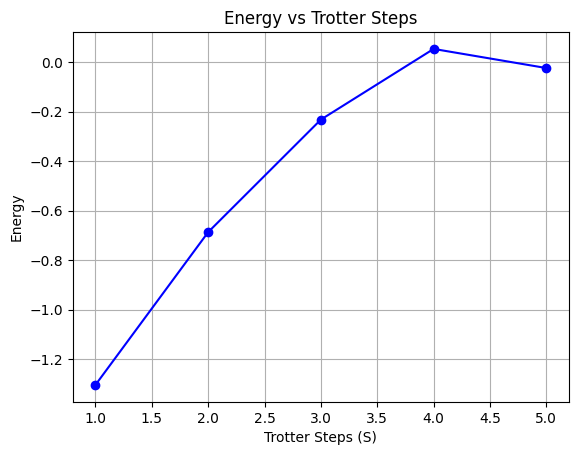

In [17]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

M = 5
t = 1.0
U = 0.1

def hubbard_hamiltonian(M, t, U):
    coeffs, ops = [], []
    for i in range(M-1):
        for spin in [0, M]:
            coeffs.append(-t/2)
            ops.append(qml.PauliX(wires=i+spin) @ qml.PauliX(wires=i+1+spin))
            coeffs.append(-t/2)
            ops.append(qml.PauliY(wires=i+spin) @ qml.PauliY(wires=i+1+spin))
    for i in range(M):
        coeffs.append(U/4)
        ops.append(qml.PauliZ(wires=i) @ qml.PauliZ(wires=i+M))
    return qml.Hamiltonian(coeffs, ops)

dev = qml.device("default.qubit", wires=2*M)

def ansatz(params, S, M):
    for s in range(S):
        for i in range(M-1):
            for spin in [0, M]:
                qml.CNOT(wires=[i+spin, i+1+spin])
                qml.RX(params[s, 0], wires=i+spin)
                qml.CNOT(wires=[i+1+spin, i+spin])
                qml.RX(params[s, 1], wires=i+1+spin)
                qml.CNOT(wires=[i+spin, i+1+spin])
        for i in range(M):
            qml.CNOT(wires=[i, i+M])
            qml.RZ(params[s, 4], wires=i+M)
            qml.CNOT(wires=[i, i+M])

def compute_energy(S, M, t, U):
    dev = qml.device("default.qubit", wires=2*M)
    H = hubbard_hamiltonian(M, t, U)
    
    @qml.qnode(dev)
    def cost_fn(params):
        ansatz(params, S, M)
        return qml.expval(H)
    
    theta = np.random.rand(S, 5, requires_grad=True)
    return cost_fn(theta)

S_values = range(1, 6)
energies = [compute_energy(S, M, t, U) for S in S_values]

plt.plot(S_values, energies, 'o-', color='blue')
plt.xlabel("Trotter Steps (S)")
plt.ylabel("Energy")
plt.title("Energy vs Trotter Steps")
plt.grid(True)
plt.show()


In [18]:
plt.savefig("energy_vs_S.png", dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

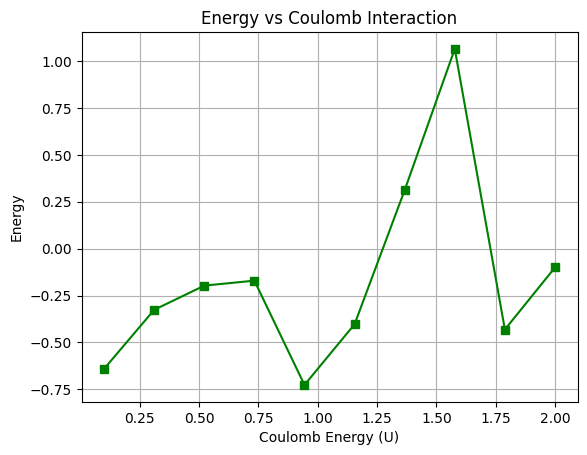

In [19]:
U_values = np.linspace(0.1, 2.0, 10)
energies_U = [compute_energy(3, M, t, U_val) for U_val in U_values]

plt.plot(U_values, energies_U, 's-', color='green')
plt.xlabel("Coulomb Energy (U)")
plt.ylabel("Energy")
plt.title("Energy vs Coulomb Interaction")
plt.grid(True)
plt.show()


In [20]:
plt.savefig("energy_vs_C.png", dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

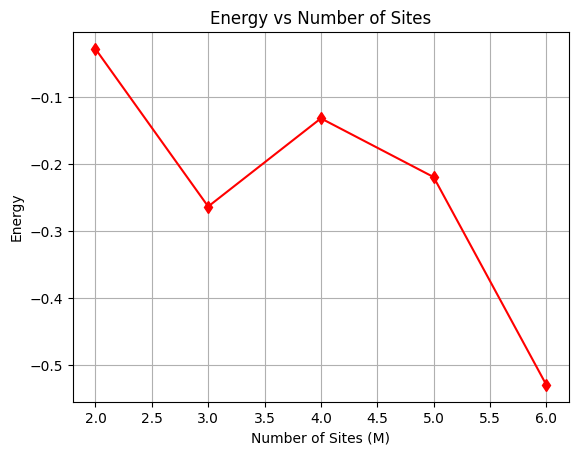

In [21]:
M_values = range(2, 7)
energies_M = [compute_energy(3, M_val, t, U) for M_val in M_values]

plt.plot(M_values, energies_M, 'd-', color='red')
plt.xlabel("Number of Sites (M)")
plt.ylabel("Energy")
plt.title("Energy vs Number of Sites")
plt.grid(True)
plt.show()


In [22]:
plt.savefig("energy_vs_M.png", dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>